In [31]:
DATA_PATH = "../data/retail_sales_dataset.csv"
import sys
sys.path.append('../src')
import pandas_helper
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

print(f"Intentando leer archivo desde: {DATA_PATH}")
df = pandas_helper.read_csv_data(DATA_PATH)

df = pandas_helper.clean_data(df)

df = pandas_helper.change_data_type(df, ["customer_id", "gender", "product_category"], "string")

df = pandas_helper.change_data_type(df, ["transaction_id", "age", "quantity", "total_amount", "price_per_unit"], "int64")

df['date'] = pd.to_datetime(df['date'])

Intentando leer archivo desde: ../data/retail_sales_dataset.csv


In [32]:
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   string        
 3   gender            1000 non-null   string        
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   string        
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), string(3)
memory usage: 70.4 KB


In [14]:
df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Existen 1000 transacciones, de las cuales, los compradores tienen en promedio 41 años. Compran 2 artículos en promedio con precios que fluctúan entre 25 y 500 dolares (min y máx).

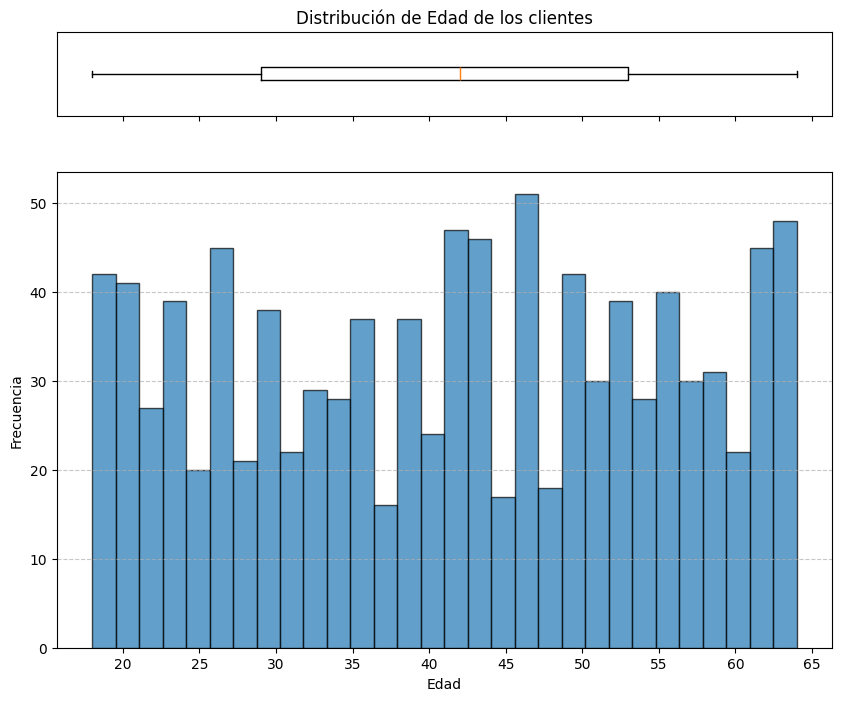

In [ ]:
age_data = [df['age']]

# Se crea una figura con dos subplots que comparten el eje x
# Usamos gridspec_kw para dar más espacio al histograma que al boxplot
_, (ax_box, ax_hist) = plt.subplots(
    2, 
    sharex=True, 
    figsize=(10, 8),
    gridspec_kw={"height_ratios": (.15, .85)}
)

# Crear el boxplot en el subplot superior (ax_box)
multiple_locator = MultipleLocator(5)
ax_box.boxplot(age_data, vert=False)
ax_box.set_yticks([]) # Ocultar los ticks del eje y del boxplot
ax_box.set_title('Distribución de Edad de los clientes')
ax_box.xaxis.set_major_locator(multiple_locator)

# Crear el histograma en el subplot inferior (ax_hist)
ax_hist.hist(age_data, bins=30, edgecolor='black', alpha=0.7)
ax_hist.set_xlabel('Edad')
ax_hist.set_ylabel('Frecuencia')
ax_hist.grid(axis='y', linestyle='--', alpha=0.7)
ax_hist.xaxis.set_major_locator(multiple_locator)

# Mostrar el gráfico
plt.show()

Del histograma se observa que existe una alta dispersión entre los clientes. Del boxplot se observa que la mayor cantidad de clientes se centra entre las edades de 30 y 55 años aproximadamente. A su vez que en promedio son clientes de 43 años aprox. 

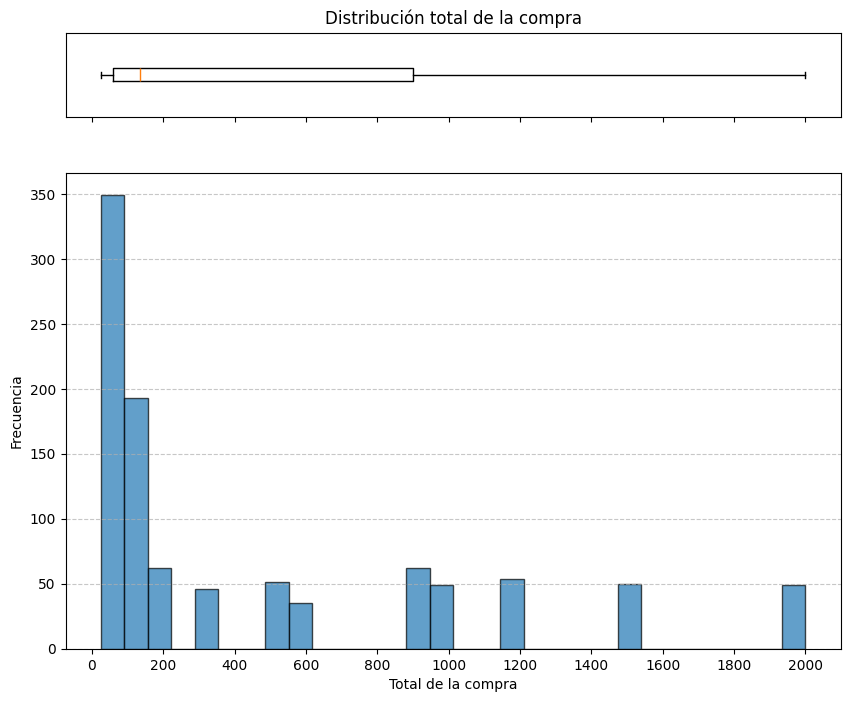

In [30]:
total_amount_data = [df['total_amount']]

# Se crea una figura con dos subplots que comparten el eje x
# Usamos gridspec_kw para dar más espacio al histograma que al boxplot
_, (ax_box, ax_hist) = plt.subplots(
    2, 
    sharex=True, 
    figsize=(10, 8),
    gridspec_kw={"height_ratios": (.15, .85)}
)

# Crear el boxplot en el subplot superior (ax_box)
multiple_locator = MultipleLocator(200)
ax_box.boxplot(total_amount_data, vert=False)
ax_box.set_yticks([]) # Ocultar los ticks del eje y del boxplot
ax_box.set_title('Distribución total de la compra')
ax_box.xaxis.set_major_locator(multiple_locator)

# Crear el histograma en el subplot inferior (ax_hist)
ax_hist.hist(total_amount_data, bins=30, edgecolor='black', alpha=0.7)
ax_hist.set_xlabel('Total de la compra')
ax_hist.set_ylabel('Frecuencia')
ax_hist.grid(axis='y', linestyle='--', alpha=0.7)
ax_hist.xaxis.set_major_locator(multiple_locator)

# Mostrar el gráfico
plt.show()

Se observa que las barras del histograma están claramente distribuidas en la izquierda del gráfico, lo que indica que el total de la mayoría de las compras es por valores inferiores a 200 dolares. Además en el boxplot se observa también esta tendencia al estar cercano al mínimo (lado izquierdo).

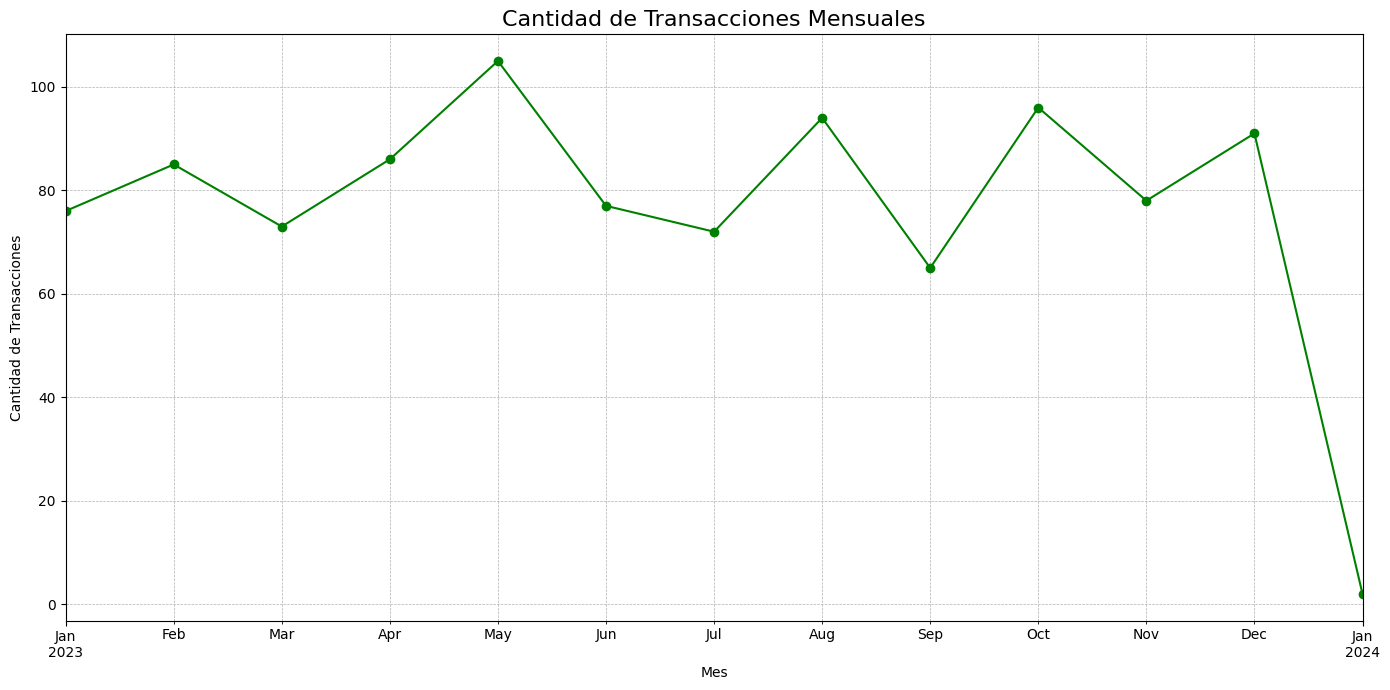

In [38]:
plt.figure(figsize=(14, 7))
monthly_sales['transaction_count'].plot(marker='o', linestyle='-', color='green')
plt.title('Cantidad de Transacciones Mensuales', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Cantidad de Transacciones')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Se observa que las ventas presentan un alza en el mes de mayo de 2023, y un descenso en el mes de Septiembre del mismo año.

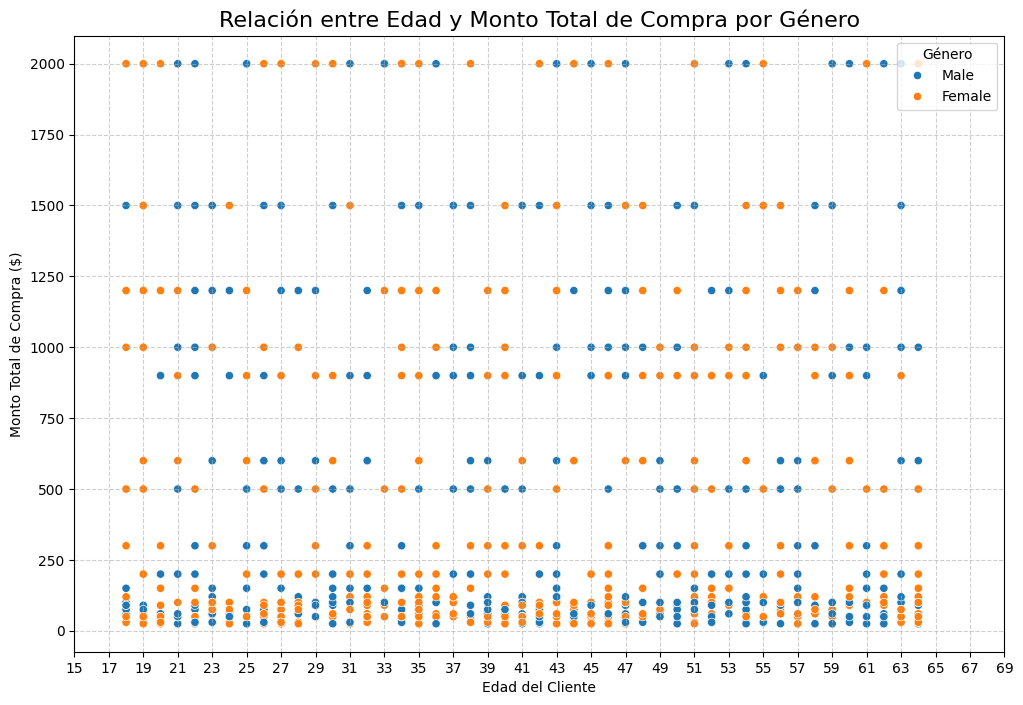

In [54]:
# Dispersión de Edad vs. Monto Total de Compra
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='age', y='total_amount', hue='gender')

plt.title('Relación entre Edad y Monto Total de Compra por Género', fontsize=16)
plt.xlabel('Edad del Cliente')
plt.ylabel('Monto Total de Compra ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Género')
plt.xticks(ticks=range(15, 70, 2))

plt.show()

De este gráfico se observa que tanto para hombres como mujeres, y para edades de entre los 18 y 64 años, el monto total de compras es igual o menor a 250 dólares en su mayoría, luego de eso existe una dispersión del total hasta llegar a los 2000 dólares. 

### **Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos -> esto se encuentra en este mismo archivo, en el gráfico "Distribución total de la compra"**